# Wranglin' We Rate Dogs

## Gather

In [2]:
import io
import numpy as np
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
% matplotlib inline

# Retrieve the WeRateDogs Twitter archive from CSV
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

# Retrieve the tweet image predictions from Udacity servers
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions_url_data = requests.get(image_predictions_url).content
image_predictions_raw_data = pd.read_csv(io.StringIO(image_predictions_url_data.decode('utf-8')), sep='\t')


In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = 'x'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Retrieve tweet ids in twitter-archive-enhanced.csv file 
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

In [ ]:
# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write(',')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [3]:
# Retrieve each tweet's retweet count and favorite ("like") count at minimum
# Had to add [] so that all of the dictionaries are in a list,
# and get rid of an extraneous comma at the end of the text file.
tweet_json = pd.DataFrame()
new_dict = {'tweet_id': [], 'favorite_count': [], 'retweet_count': []}
with open('tweet_json.txt') as json_file:

    data = json.load(json_file)

x=0
for dict in data: 
    data_row = data[x]

    new_dict['tweet_id'].append(data_row['id'])
    new_dict['favorite_count'].append(data_row['favorite_count'])
    new_dict['retweet_count'].append(data_row['retweet_count'])
    tweet_json = pd.DataFrame(new_dict)
    
    x+=1

In [ ]:
tweet_json.head()

## Assess

In [3]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
image_predictions_raw_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [ ]:
tweet_json

In [ ]:
twitter_archive.info()

In [ ]:
image_predictions_raw_data.info()

In [ ]:
tweet_json.info()

In [ ]:
all_columns = pd.Series(list(twitter_archive) + list(image_predictions_raw_data) + list())
all_columns[all_columns.duplicated()]

In [ ]:
twitter_archive.isnull().sum()

In [ ]:
image_predictions_raw_data.isnull().sum()

In [ ]:
tweet_json.isnull().sum()

In [ ]:
twitter_archive.describe()

In [ ]:
image_predictions_raw_data.describe()

In [ ]:
tweet_json.describe()

In [ ]:
twitter_archive.sample(5)

In [ ]:
image_predictions_raw_data.sample(5)

In [ ]:
tweet_json.sample(5)

In [ ]:
twitter_archive.duplicated().sum()

In [ ]:
image_predictions_raw_data.duplicated().sum()

In [ ]:
tweet_json.duplicated().sum()

In [ ]:
twitter_archive.timestamp.max()

In [ ]:
twitter_archive.name.isnull().sum()

In [ ]:
twitter_archive.doggo.value_counts()

In [ ]:
twitter_archive.floofer.value_counts()

In [ ]:
twitter_archive.pupper.value_counts()

In [ ]:
twitter_archive.puppo.value_counts()

In [ ]:
twitter_archive.rating_denominator.value_counts()

In [ ]:
pd.set_option('display.max_colwidth', -1)
print(twitter_archive.text + " "+ twitter_archive.name)


In [ ]:
for name in twitter_archive.name:
    if name[0].islower():
        print(name)

#### Quality
##### `twitter_archive` table
- 2175 records have not been retweeted
- Name has values like `None` and `the`, `a`, `an`
- Some ratings are not out of 10 ex, 666287406224695296
- Timestamp should use the datetime64 data type
- `None` string in Dog stage data
- Missing Dog stage data
- Dog stage data should use the category data type

##### `image_predictions_raw_data` table
- Missing images (2075 instead of 2175)

##### `tweet_json` table


#### Tidiness
- tweet_id column in `twitter_archive` table duplicated in `image_predictions_raw_data`, `tweet_json`, and `dog_stages` tables
- `favorite_count` and `retweet_count` should be part of `twitter_archive` table
- Remove unecessary columns from `twitter_archive` table

## Clean

In [4]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions_raw_data.copy()
tweet_json_clean = tweet_json.copy()

#### `twitter_archive`: 2175 records have not been retweeted

##### Define
Only select records that have not been retweeted

##### Code

In [5]:
twitter_archive_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [6]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

##### Test

In [7]:
twitter_archive_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   58
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [8]:
twitter_archive_clean.shape

(2175, 17)

#### `twitter_archive`: Name has values like `None` and `the`, `a`, `an`

##### Define
Remove records that have names with values like `None` and that start with a lower case letter. It looks like the name was pulled from regular expression that pulls "This is <name>". In the case where the regular expression returned `None`, the "This is ..." expression was not found. In the case where the expression was found, but with a lowercase letter, the string was not a name. 

In [9]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name != 'None']

In [10]:
twitter_archive_clean.shape

(1495, 17)

In [11]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name.str[0].str.isupper()]

In [12]:
twitter_archive_clean.shape

(1391, 17)

##### Test

In [13]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 17 columns):
tweet_id                      1391 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1391 non-null object
source                        1391 non-null object
text                          1391 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1391 non-null object
rating_numerator              1391 non-null int64
rating_denominator            1391 non-null int64
name                          1391 non-null object
doggo                         1391 non-null object
floofer                       1391 non-null object
pupper                        1391 non-null object
puppo                         1391 non-null object
dtypes: float64(4), int64(3), object(10)

In [14]:
twitter_archive_clean.name.sample(10)

2120     Scooter
536       Lennon
665        Mosby
1463        Phil
2126     Butters
1223      Thumas
2111        Koda
1794       Derek
2069    Clarence
816      Winston
Name: name, dtype: object

#### `twitter_archive`: Timestamp should use the datetime64 data type

##### Define
Convert timestamp to datetime64 data type

##### Code

In [15]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 17 columns):
tweet_id                      1391 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1391 non-null object
source                        1391 non-null object
text                          1391 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1391 non-null object
rating_numerator              1391 non-null int64
rating_denominator            1391 non-null int64
name                          1391 non-null object
doggo                         1391 non-null object
floofer                       1391 non-null object
pupper                        1391 non-null object
puppo                         1391 non-null object
dtypes: float64(4), int64(3), object(10)

In [16]:
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.astype('datetime64')

##### Test

In [17]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 17 columns):
tweet_id                      1391 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1391 non-null datetime64[ns]
source                        1391 non-null object
text                          1391 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1391 non-null object
rating_numerator              1391 non-null int64
rating_denominator            1391 non-null int64
name                          1391 non-null object
doggo                         1391 non-null object
floofer                       1391 non-null object
pupper                        1391 non-null object
puppo                         1391 non-null object
dtypes: datetime64[ns](1), float

In [18]:
twitter_archive_clean.timestamp.sample(5)

1562   2016-01-16 04:11:31
205    2017-04-14 15:51:39
984    2016-07-02 19:01:20
879    2016-08-03 00:59:13
123    2017-05-28 17:23:24
Name: timestamp, dtype: datetime64[ns]

#### `twitter_archive`: Some ratings are not out of 10

##### Define
Update the `rating_denominator` to 10.

#### Code

In [19]:
twitter_archive_clean['rating_denominator'] = 10

#### Test

In [20]:
twitter_archive_clean.rating_denominator.value_counts()

10    1391
Name: rating_denominator, dtype: int64

In [21]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 17 columns):
tweet_id                      1391 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1391 non-null datetime64[ns]
source                        1391 non-null object
text                          1391 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1391 non-null object
rating_numerator              1391 non-null int64
rating_denominator            1391 non-null int64
name                          1391 non-null object
doggo                         1391 non-null object
floofer                       1391 non-null object
pupper                        1391 non-null object
puppo                         1391 non-null object
dtypes: datetime64[ns](1), float

#### `twitter_archive`: `None` string in Dog stage data

##### Define
Replace `None` with empty NaN



##### Code

In [22]:
twitter_archive_clean.doggo = twitter_archive_clean.doggo.replace('None', np.nan)

In [23]:
twitter_archive_clean.floofer = twitter_archive_clean.floofer.replace('None', np.nan)

In [24]:
twitter_archive_clean.pupper = twitter_archive_clean.pupper.replace('None', np.nan)

In [25]:
twitter_archive_clean.puppo = twitter_archive_clean.puppo.replace('None', np.nan)

##### Test

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 17 columns):
tweet_id                      1391 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1391 non-null datetime64[ns]
source                        1391 non-null object
text                          1391 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1391 non-null object
rating_numerator              1391 non-null int64
rating_denominator            1391 non-null int64
name                          1391 non-null object
doggo                         42 non-null object
floofer                       5 non-null object
pupper                        125 non-null object
puppo                         16 non-null object
dtypes: datetime64[ns](1), float64(4), i

#### `twitter_archive`: Missing Dog stage data

##### Define
1) Parse dog stage from text

2) Use keywords from the Dogtionary to determine Dog stage (out of scope (time))


##### Code

In [27]:
twitter_archive_clean['dog_stages'] = twitter_archive_clean.text.str.extract(r'(?i)(doggo|pupper|puppo|blep|snoot|floof)', expand=True)
twitter_archive_clean['dog_stages'] = twitter_archive_clean.dog_stages.str.lower()

In [28]:
twitter_archive_clean.query('floofer == "floofer"').count()

tweet_id                      5
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     5
source                        5
text                          5
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 5
rating_numerator              5
rating_denominator            5
name                          5
doggo                         0
floofer                       5
pupper                        0
puppo                         0
dog_stages                    5
dtype: int64

In [29]:
twitter_archive_clean.dog_stages.value_counts()

pupper    128
doggo      43
floof      23
puppo      21
blep        2
Name: dog_stages, dtype: int64

Since the dog stages I collected in the `dog_stages` column using the regular expression add up to more than the three dog stage columns initially collected, I will use the `dog_stages` column for analysis. 

#### `twitter_archive`: Dog stage data should use the category data type

##### Define
Convert dog stage from string to category data type

##### Code

In [30]:
twitter_archive_clean.dog_stages = twitter_archive_clean.dog_stages.astype('category')

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 18 columns):
tweet_id                      1391 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1391 non-null datetime64[ns]
source                        1391 non-null object
text                          1391 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1391 non-null object
rating_numerator              1391 non-null int64
rating_denominator            1391 non-null int64
name                          1391 non-null object
doggo                         42 non-null object
floofer                       5 non-null object
pupper                        125 non-null object
puppo                         16 non-null object
dog_stages                    217 non-nu

In [32]:
twitter_archive_clean.dog_stages.sample(10)

525     NaN
1170    NaN
2207    NaN
2263    NaN
738     NaN
1573    NaN
1521    NaN
2246    NaN
1006    NaN
1553    NaN
Name: dog_stages, dtype: category
Categories (5, object): [blep, doggo, floof, pupper, puppo]

#### `image_predictions_raw_data`: Missing images (2075 instead of 2175)

In [33]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


This should be resolved now that we have shaved down the number of tweets to 1391. We will confirm when we tidy up the data.

### Tidiness

#### `favorite_count` and `retweet_count` should be part of twitter_archive table

##### Define
Merge the *favorite_count* column and *retweet_count* to the `twitter_archive` table, joining on *tweet_id*.

##### Code

In [34]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean,
                            on=['tweet_id'])

##### Test

In [35]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,37567,8196
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,NaN,32295,6059
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,NaN,24339,4008
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN,40924,8352
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN,39117,9045


In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1386
Data columns (total 20 columns):
tweet_id                      1387 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1387 non-null datetime64[ns]
source                        1387 non-null object
text                          1387 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1387 non-null object
rating_numerator              1387 non-null int64
rating_denominator            1387 non-null int64
name                          1387 non-null object
doggo                         42 non-null object
floofer                       5 non-null object
pupper                        125 non-null object
puppo                         16 non-null object
dog_stages                    217 non-nu

#### `image_predictions` columns should be part of twitter_archive table

##### Define
Merge the all `image_predictions` columns to  `twitter_archive` table, joining on *tweet_id*.

##### Code

In [38]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean,
                            on=['tweet_id'])

##### Test

In [39]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Remove unecessary columns from `twitter_archive` table

##### Define
Remove the *retweeted_status_id*, *retweeted_status_user_id*, *retweeted_status_timestamp*, *doggo_x*, *doggo_y*, *floofer_x*, *floofer_y*, *pupper_x*, *pupper_y*, *puppo_x*, *puppo_y* from  `twitter_archive`.

In [40]:
twitter_archive_clean = twitter_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','doggo','floofer','pupper','puppo'])

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1345
Data columns (total 24 columns):
tweet_id                 1346 non-null int64
in_reply_to_status_id    1 non-null float64
in_reply_to_user_id      1 non-null float64
timestamp                1346 non-null datetime64[ns]
source                   1346 non-null object
text                     1346 non-null object
expanded_urls            1346 non-null object
rating_numerator         1346 non-null int64
rating_denominator       1346 non-null int64
name                     1346 non-null object
dog_stages               210 non-null category
favorite_count           1346 non-null int64
retweet_count            1346 non-null int64
jpg_url                  1346 non-null object
img_num                  1346 non-null int64
p1                       1346 non-null object
p1_conf                  1346 non-null float64
p1_dog                   1346 non-null bool
p2                       1346 non-null object
p2_conf              

In [48]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')
image_predictions_clean.to_csv('image_predictions.tsv', sep='\t')

## Insights

In [43]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')


- People love to show off their puppies. Puppers are mentioned alot.

In [53]:
twitter_archive_master.dog_stages.value_counts()

pupper    124
doggo      41
floof      23
puppo      20
blep        2
Name: dog_stages, dtype: int64

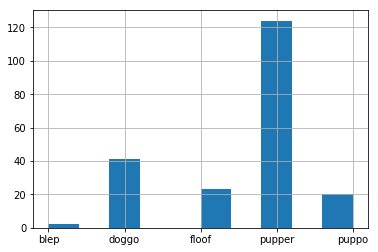

In [63]:
twitter_archive_master['dog_stages'].hist()

- Golden retrievers are popular dogs

In [44]:
twitter_archive_master.p1.value_counts()

golden_retriever                  92
Pembroke                          64
Labrador_retriever                62
Chihuahua                         59
pug                               39
chow                              31
toy_poodle                        28
Pomeranian                        26
Samoyed                           22
malamute                          22
French_bulldog                    21
Siberian_husky                    19
cocker_spaniel                    19
Chesapeake_Bay_retriever          16
miniature_pinscher                16
Staffordshire_bullterrier         16
Shih-Tzu                          15
seat_belt                         15
Shetland_sheepdog                 14
Cardigan                          14
German_shepherd                   14
beagle                            13
Eskimo_dog                        12
Pekinese                          11
Italian_greyhound                 11
teddy                             11
Old_English_sheepdog              10
b

In [47]:
twitter_archive_master.query('p1 == "golden_retriever" and p1_conf > .5').count()

Unnamed: 0               76
tweet_id                 76
in_reply_to_status_id     0
in_reply_to_user_id       0
timestamp                76
source                   76
text                     76
expanded_urls            76
rating_numerator         76
rating_denominator       76
name                     76
dog_stages               16
favorite_count           76
retweet_count            76
jpg_url                  76
img_num                  76
p1                       76
p1_conf                  76
p1_dog                   76
p2                       76
p2_conf                  76
p2_dog                   76
p3                       76
p3_conf                  76
p3_dog                   76
dtype: int64

- There's a strong relationship between how a dog is rated and how many times their tweet has been retweeted. 

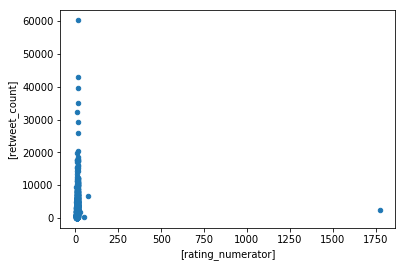

In [76]:
twitter_archive_master.plot(x=['rating_numerator'],y=['retweet_count'],kind='scatter')

### Resources

- https://pandas.pydata.org/pandas-docs/stable/index.html
- https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
- https://pythex.org/